Train a Simple ML Model in Python

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Load preprocessed data
df = pd.read_csv("/content/Heart_disease prediction using sql preprocessing.csv", delimiter=';')

In [18]:
df.head()

,Age,AgeGroup,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,SexEncoded,ChestPainEncoded,ExerciseAnginaEncoded,Heart_Disease
0,40,Middle-aged,140,289,0,172,0.0,1,2,0,0
1,49,Middle-aged,160,180,0,156,1.0,0,3,0,1
2,37,Young,130,283,0,98,0.0,1,2,0,0
3,48,Middle-aged,138,214,0,108,1.5,0,4,1,1
4,54,Middle-aged,150,195,0,122,0.0,1,3,0,0


In [19]:
df.columns

Index(['Age', 'AgeGroup', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'SexEncoded', 'ChestPainEncoded', 'ExerciseAnginaEncoded',
       'Heart_Disease'],
      dtype='object')

In [20]:
df.columns=df.columns.str.strip()

In [21]:
for col in df.columns:
  print(f"'{col}'")

'Age'
'AgeGroup'
'RestingBP'
'Cholesterol'
'FastingBS'
'MaxHR'
'Oldpeak'
'SexEncoded'
'ChestPainEncoded'
'ExerciseAnginaEncoded'
'Heart_Disease'


In [22]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                      0
AgeGroup                 0
RestingBP                0
Cholesterol              0
FastingBS                0
MaxHR                    0
Oldpeak                  0
SexEncoded               0
ChestPainEncoded         0
ExerciseAnginaEncoded    0
Heart_Disease            0
dtype: int64


In [23]:
# Explore the data
print("\nData summary:\n", df.describe())


Data summary:
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  SexEncoded  ChestPainEncoded  ExerciseAnginaEncoded  \
count  918.000000  918.000000        918.000000             918.000000   
mean     0.887364    0.789760          3.251634               0.404139   
std      1.066570    0.407701          0.931031               0.490992   
min     -2.600000    0.000000          1.000000          

In [24]:
print("\nClass distribution:\n", df['Heart_Disease'].value_counts())


Class distribution:
 Heart_Disease
1    508
0    410
Name: count, dtype: int64


In [29]:
# Separate features and target
X = df.drop(['Heart_Disease', 'AgeGroup'], axis=1)

y = df["Heart_Disease"]
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7934782608695652
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        77
           1       0.85      0.79      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



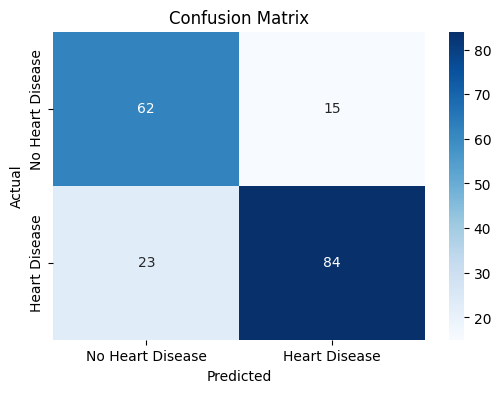

In [31]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

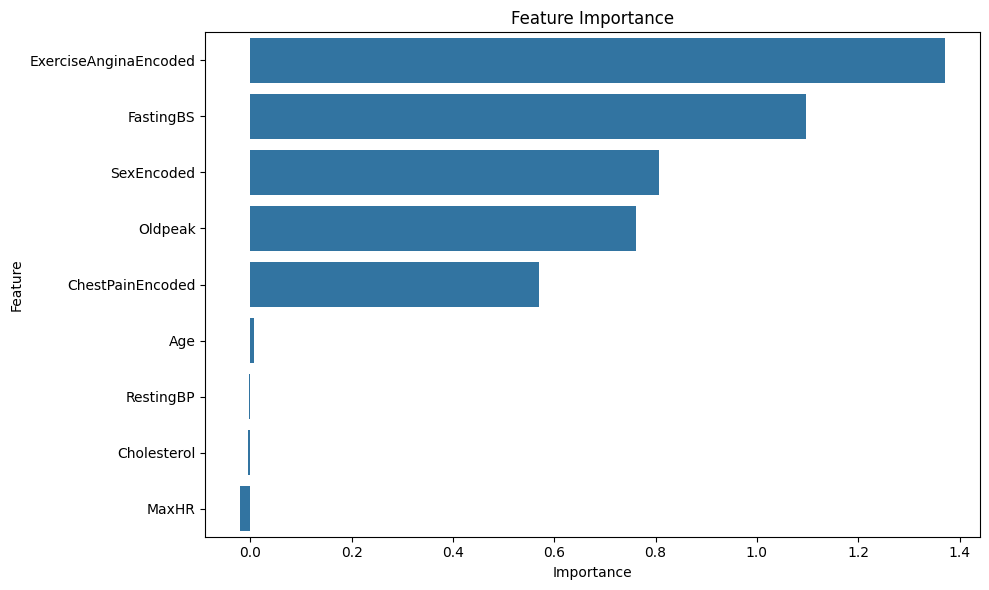

In [32]:
# Feature importance
if hasattr(model, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.coef_[0]
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()